# Positional Encoding

Contributor: michaelmenzel@google.com

Various experiments which explore positional encodings used in transformers.

In [31]:
#@title Imports and Helpers
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf

def positional_encoding(seq_len, d_model, M):
  positions = np.arange(seq_len)[:, np.newaxis] #pos
  indices = np.arange(d_model)[np.newaxis, :] #i
  radians = (positions
             / np.power(M, 
                        (2 * (indices//2))
                         / np.float32(d_model)))

  # sin for even indices 2i
  radians[0::2] = np.sin(radians[0::2])

  # cos for odd indices 2i+1
  radians[1::2] = np.cos(radians[1::2])

  return tf.cast(radians, dtype=tf.float32)

def patch_encoding(image, patch_size, projection_dim):
  patches = tf.image.extract_patches(
            images=[image],
            sizes=[1, patch_size, patch_size, 1],
            strides=[1, patch_size, patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
  patch_dims = patches.shape[-1]
  patches = tf.reshape(patches, [-1, patch_dims])

  projection = tf.keras.layers.Dense(units=projection_dim)(patches)
  positions = tf.range(len(patches))
  positions_embed = tf.keras.layers.Embedding(
            input_dim=len(patches), output_dim=projection_dim
        )(positions)
  
  return projection + positions_embed, projection, positions_embed

def plot_tensor(tensor):
  fig, ax = plt.subplots(figsize=(20, 10))
  ax.imshow(tensor, cmap='viridis')
  plt.axis('off')
  plt.show()

## Positional Encoding for Sequences

In [2]:
#@title Parameters
seq_len = 100 #@param {type:"integer"}
d_model = 50 #@param {type:"integer"}
M = 100 #@param {type:"integer"}

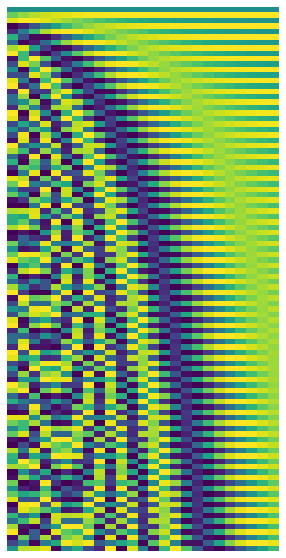

In [3]:
plot_tensor(positional_encoding(seq_len, d_model, M))

Test Tensor:
 [63 70 17 63 74 59 27 24 64  8 82 11 99 34 35 65 99 51 96 55 93 42 59 25
 11 77 27 11 54 39 57 59 79 73 90 51 64 58 93  1 89 43 69 28 19 61 97 27
 85 61 95 54 84 32 90 20 92 33 98  7 99  5 47 51 74  4 73 39  9 49 77 83
 12 57 26 93 81 56 77 85 31 26 27 69 37 40 94 92 62  1 80 63 48 96 32 87
 32 54 72 18]


Embedding:


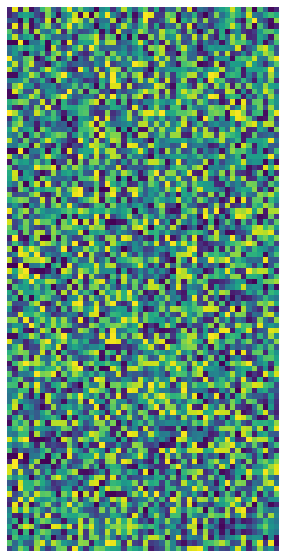

Positional Encoding:


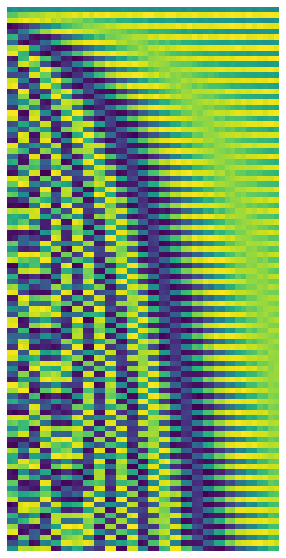

In [28]:
test_instance = tf.random.uniform((seq_len,), maxval=seq_len, dtype=tf.int32)

print('Test Tensor:\n', test_instance.numpy())
plot_tensor(tf.expand_dims(test_instance, axis=0))

embedding = tf.keras.layers.Embedding(seq_len, d_model)(test_instance)
print('Embedding:')
plot_tensor(embedding)
test_pos_enc = embedding + positional_encoding(seq_len, d_model, M)
print('Positional Encoding:')
plot_tensor(test_pos_enc)

## Positional Encoding for Images (with Patches)

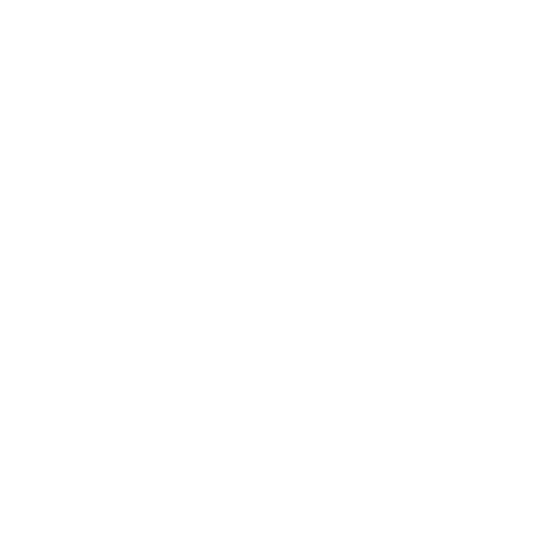

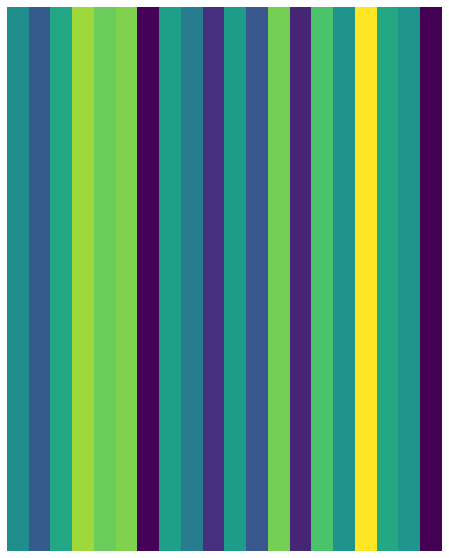

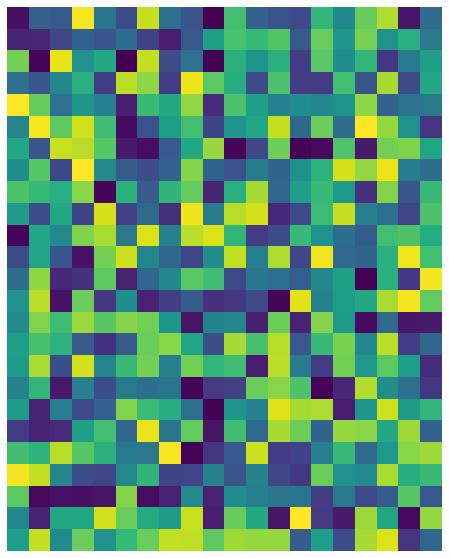

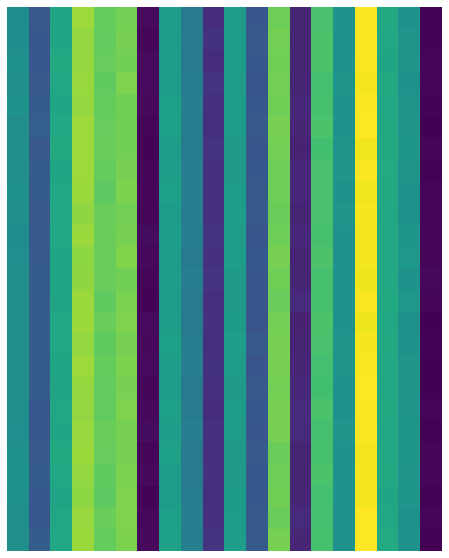

In [32]:
image = tf.ones((50, 50, 3))
patch_size = 10
projection_dim = 20

plot_tensor(image)
encoding, projection, embedding = patch_encoding(image, patch_size, projection_dim)
plot_tensor(projection)
plot_tensor(embedding)
plot_tensor(encoding)

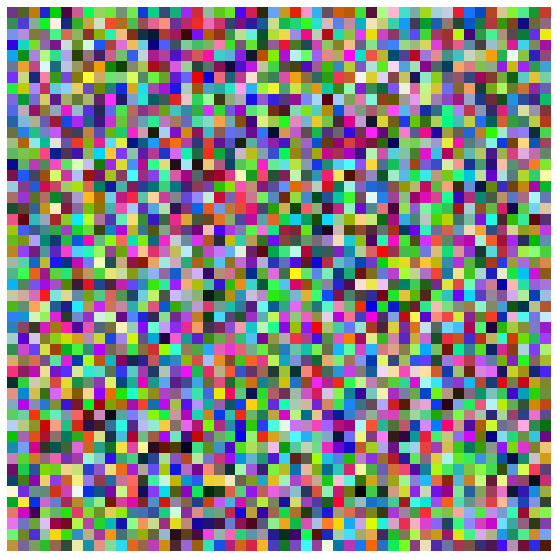

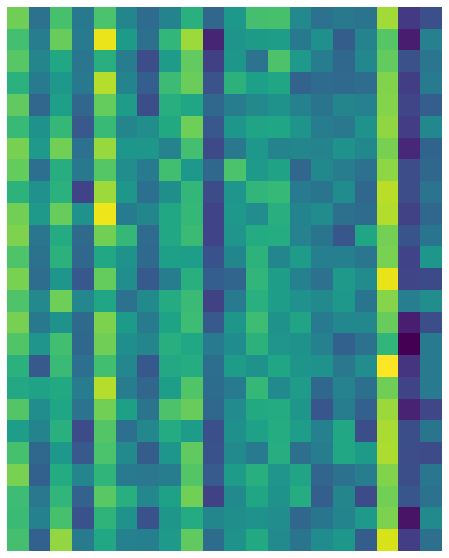

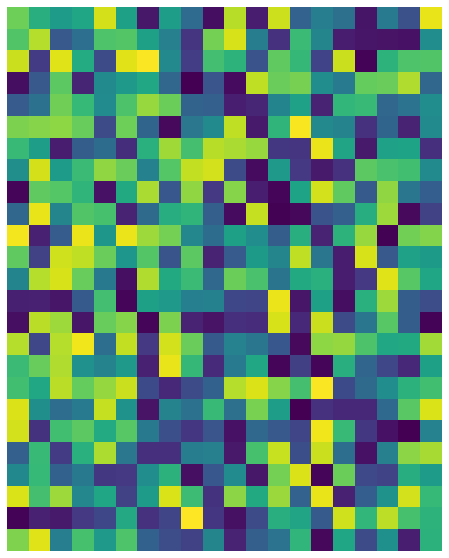

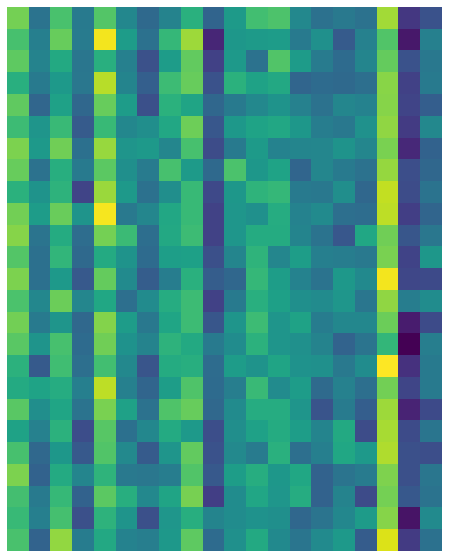

In [33]:
image = tf.random.uniform((50, 50, 3))
patch_size = 10
projection_dim = 20

plot_tensor(image)
encoding, projection, embedding = patch_encoding(image, patch_size, projection_dim)
plot_tensor(projection)
plot_tensor(embedding)
plot_tensor(encoding)